In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Simulation

Let's play a game: we each roll a die. 

If my number is bigger: you pay me a dollar.

If they're the same: we do nothing.

If your number is bigger: I pay you a dollar.

In [2]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    elif your_roll == my_roll:
        return 0

In [4]:
die_faces = np.arange(1, 7)

In [5]:
def simulate_one_round():
    my_roll = np.random.choice(die_faces)
    your_roll = np.random.choice(die_faces)
    return one_round(my_roll, your_roll)

In [17]:
simulate_one_round()

-1

In [19]:
game_outcomes = make_array() #Create an array or "an empty bag" that will contain all results for all simulations

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())

In [20]:
game_outcomes

array([ 1.,  1., -1., ...,  0.,  1.,  1.])

In [21]:
results = Table().with_column('My winnings', game_outcomes)

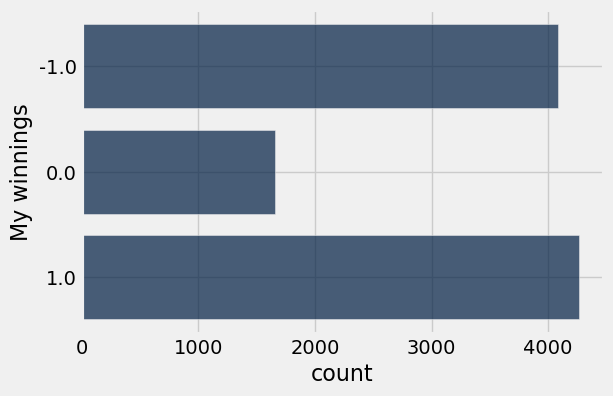

In [8]:
results.group('My winnings').barh('My winnings')

## Monty Hall

In [10]:
# Behind the door of our choice
doors = make_array('car', 'first goat', 'second goat')

# Our two goats
goats = make_array('first goat', 'second goat')

In [11]:
def other_goat(a_goat):
    """If we picked a goat, this returns the other goat"""
    
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'


In [12]:
other_goat('first goat')

'second goat'

In [14]:
other_goat('Hanes hall')

In [23]:
def monty_hall():
    
    # randomly choose a door
    contestant_choice = np.random.choice(doors)
    
    # For the three possible choices
    # What does Monty show you?
    # What is remaining?
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return make_array(contestant_choice, monty_choice, remaining_door)

In [25]:
monty_hall()

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [26]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [28]:
games.append(monty_hall())

Guess,Revealed,Remaining
first goat,second goat,car
first goat,second goat,car


In [29]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in range(10000):
    games.append(monty_hall())
    
games

Guess,Revealed,Remaining
second goat,first goat,car
car,first goat,second goat
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
first goat,second goat,car
car,second goat,first goat
first goat,second goat,car
second goat,first goat,car
car,second goat,first goat


### If we switch doors

In [30]:
games.group('Remaining') 

Remaining,count
car,6578
first goat,1727
second goat,1695


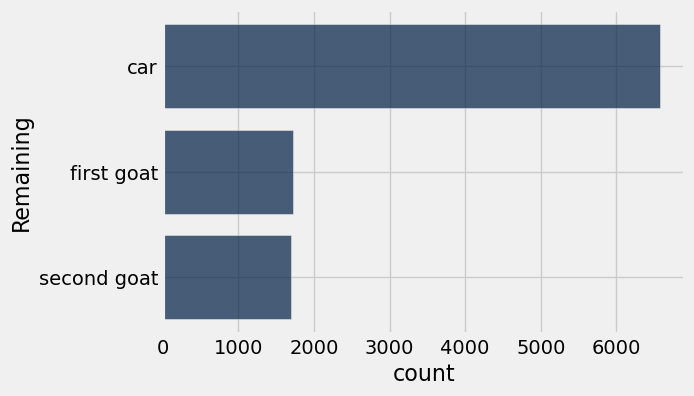

In [31]:
games.group('Remaining').barh('Remaining')

In [32]:
games.group('Remaining').column('count') / sum(games.group('Remaining').column('count'))

array([ 0.6578,  0.1727,  0.1695])

### If we *don't* switch doors

In [33]:
games.group('Guess')

Guess,count
car,3422
first goat,3271
second goat,3307


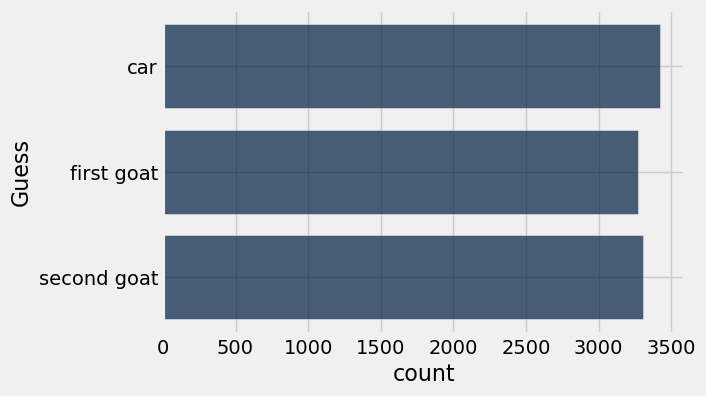

In [34]:
games.group('Guess').barh('Guess')

In [35]:
games.group('Guess').column('count') / sum(games.group('Guess').column('count'))

array([ 0.3422,  0.3271,  0.3307])